In [1]:
import pickle
import pandas as pd
import numpy as np

from ribs.visualize import grid_archive_heatmap
import matplotlib.pyplot as plt
# import imageio

In [2]:
with open(r"./results/20231209_011014_Results_MAPElites_Iterations=100.pkl", 'rb') as file:
    raw_results = pickle.load(file)

In [3]:
iterations = raw_results["convergence"].keys()

In [4]:
batch_size=48*5

# Quality Improvements

In [5]:
improvements = [v["improvements_quality"] for k,v in raw_results["convergence"].items()]
cumsum_improvements = np.cumsum(improvements)

Text(0.5, 1.0, 'Convergence')

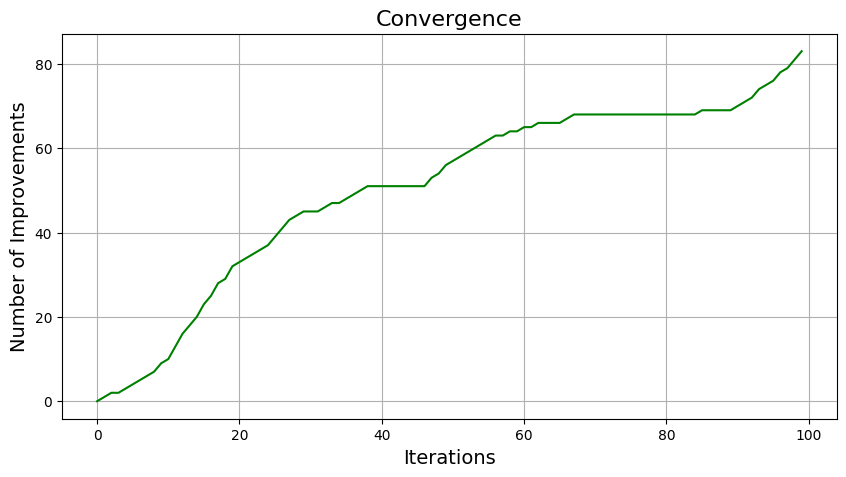

In [6]:
plt.figure(figsize=(10,5))
plt.grid()
#plt.scatter(iterations, cumsum_improvements)
plt.plot(iterations, cumsum_improvements, color="green") #label="Non-Linear Behaviour Space",
plt.xlabel("Iterations", fontsize=14)
plt.ylabel("Number of Improvements", fontsize=14)
plt.title("Convergence", fontsize=16)
# plt.legend()

Text(0.5, 1.0, 'Convergence')

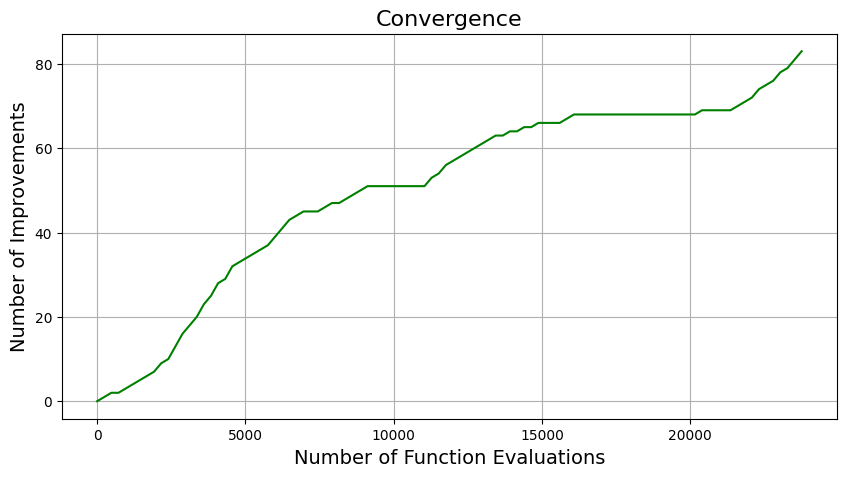

In [7]:
plt.figure(figsize=(10,5))
plt.grid()
#plt.scatter(iterations, cumsum_improvements)
plt.plot([batch_size*itr for itr in iterations], cumsum_improvements, color="green") #label="Non-Linear Behaviour Space",
plt.xlabel("Number of Function Evaluations", fontsize=14)
plt.ylabel("Number of Improvements", fontsize=14)
plt.title("Convergence", fontsize=16)
# plt.legend()

## Sum of Distance

In [8]:
dict_archive_complex = {}

all_iterations_complex = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90]
for it in all_iterations_complex:
    with open("./results/20231209_011014_Intermediate_Results_MAPElites_Iterations="+ str(it)+".pkl", 'rb') as file:
        raw_results = pickle.load(file)
        dict_archive_complex[it] = raw_results["archive"]
        
with open("./results/20231209_011014_Results_MAPElites_Iterations=100.pkl", 'rb') as file:
    raw_results = pickle.load(file)
    dict_archive_complex[100] = raw_results["archive"]
    
#calculate sum of distances
dict_sum_distance_complex = {k: sum([e.objective for e in v]) for k,v in dict_archive_complex.items()}

In [9]:
dict_sum_distance_complex

{0: -366.3814983766708,
 10: -125.76788143352283,
 20: -35.98382994765289,
 30: -30.434672058195044,
 40: -29.713933403048703,
 50: -39.89771758111225,
 60: -37.52745216883765,
 70: -37.22710709636365,
 80: -37.22710709636365,
 90: -37.110920512365944,
 100: -34.39762349356608}

(-100.0, 0.0)

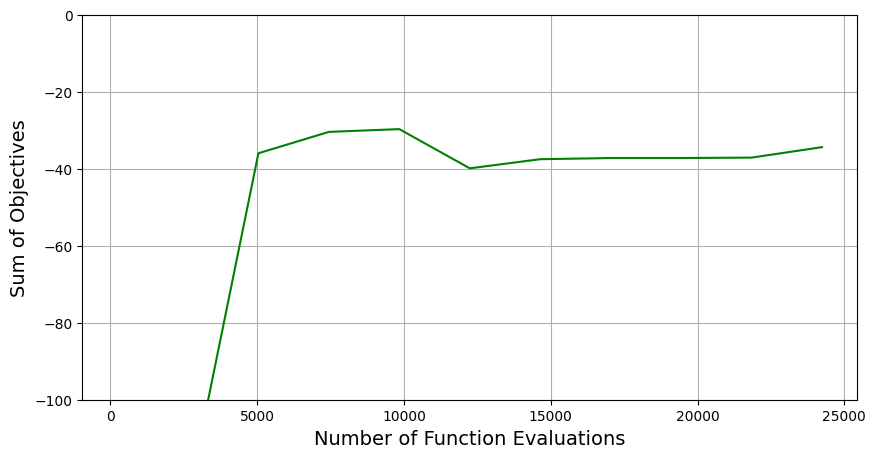

In [10]:
plt.figure(figsize=(10,5))
plt.grid()
plt.plot([((it+1)*batch_size) for it in dict_sum_distance_complex.keys()], dict_sum_distance_complex.values(), color="green") #label="Non-Linear Behaviour Space",
plt.xlabel("Iterations", fontsize=14)
plt.xlabel("Number of Function Evaluations", fontsize=14)
plt.ylabel("Sum of Objectives", fontsize=14)
plt.ylim(-100, 0)
#plt.title("Convergence", fontsize=16)
#plt.legend(loc="lower right")

In [11]:
[float(i)/max(dict_sum_distance_complex.values()) for i in dict_sum_distance_complex.values()]

[12.330292775680764,
 4.232623117497424,
 1.2110086355635732,
 1.0242559154107949,
 1.0,
 1.3427275695858791,
 1.2629580762601853,
 1.2528501895526254,
 1.2528501895526254,
 1.2489400177681727,
 1.1576260546520853]

(0.0, 12.896807414464803)

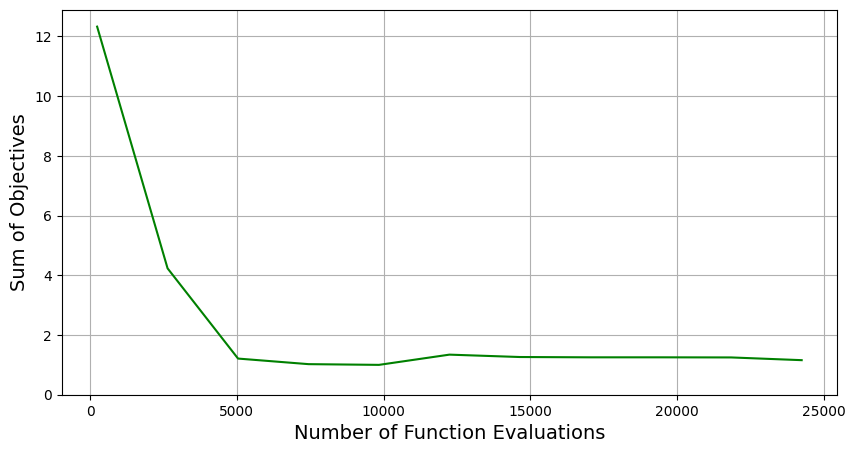

In [12]:
plt.figure(figsize=(10,5))
plt.grid()
plt.plot([(it+1)*batch_size for it in dict_sum_distance_complex.keys()], [float(i)/max(dict_sum_distance_complex.values()) for i in dict_sum_distance_complex.values()], color="green") #label="Non-Linear Behaviour Space",
#plt.xlabel("Iterations", fontsize=14)
plt.xlabel("Number of Function Evaluations", fontsize=14)
plt.ylabel("Sum of Objectives", fontsize=14)
plt.ylim(0)
# plt.legend(loc="lower right")

# Coverage

In [13]:
coverage = [v["coverage_diversity"] for k,v in raw_results["convergence"].items()]

In [14]:
#add zero point
iterations = [0] + list(iterations)
coverage = [0] + coverage

Text(0.5, 1.0, 'Diversity [0,1]')

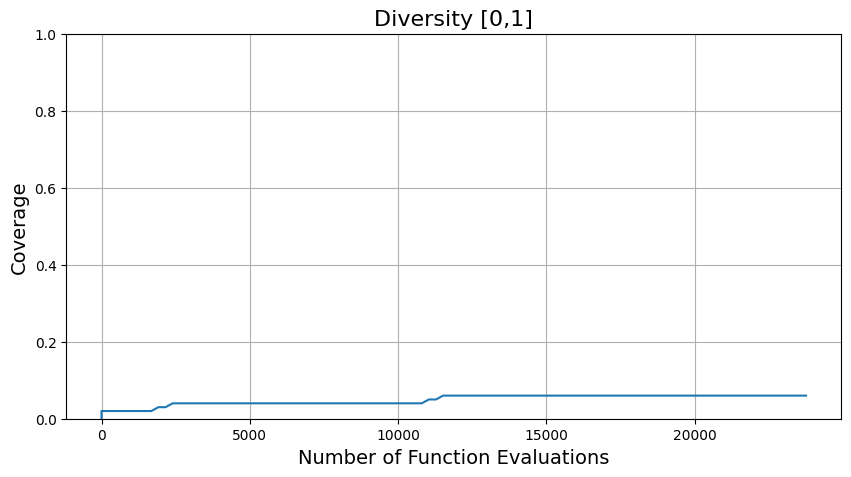

In [15]:
plt.figure(figsize=(10,5))
plt.grid()
plt.plot([batch_size*itr for itr in iterations], coverage) #label="Non-Linear Behaviour Space"
plt.ylim(0, 1)
# plt.xlabel("Iterations", fontsize=14)
plt.xlabel("Number of Function Evaluations", fontsize=14)
plt.ylabel("Coverage", fontsize=14)
plt.title("Diversity [0,1]", fontsize=16)
# plt.legend()

In [16]:
num_elites = [v["num_elites_diversity"] for k,v in raw_results["convergence"].items()]
num_elites = [0] + num_elites

Text(0.5, 1.0, 'Diversity [#]')

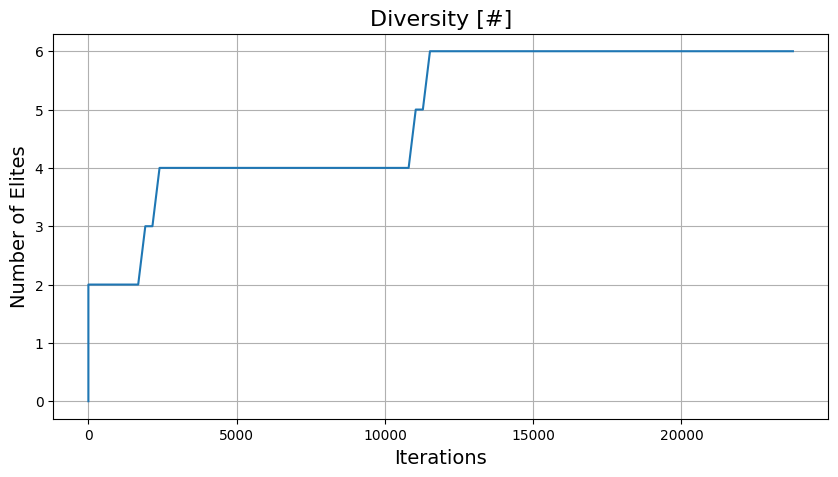

In [17]:
plt.figure(figsize=(10,5))
plt.grid()
plt.plot([batch_size*itr for itr in iterations], num_elites)
plt.xlabel("Iterations", fontsize=14)
plt.ylabel("Number of Elites", fontsize=14)
plt.title("Diversity [#]", fontsize=16)